In [199]:
import random
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
import csv
import numpy as np
from tabulate import tabulate
from classification import classification
from rule_gen import rule_generation
from daehan_mlutil import utilities
from util import util

with open('../data/dataset.csv', 'r') as file:
    dataset = [list(filter(None, row)) for row in csv.reader(file)]

min_support = 0.2
transactions_df = util.convert_trans_to_df(dataset)
transactions_df

,0,1,ACETAMINOPHEN,ALBUMIN HUMAN 25%,ALBUMIN HUMAN 5%,ALBUTEROL 0.083%,ALBUTEROL 90 MCG,ALBUTEROL CONCENTRATED 0.5%,ALLOPURINOL,ALPRAZOLAM,...,TACROLIMUS,TAMSULOSIN,THIAMINE,TRAMADOL,TRAZODONE,VANCOMYCIN,VANCOMYCIN 1 G/200 ML D5W,VANCOMYCIN 1.25 G/250 ML NS,VANCOMYCIN 1.5 G/500 ML NS,WARFARIN
0,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,True,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610,True,False,True,False,False,False,True,True,False,False,...,False,False,False,True,True,False,True,True,True,False
4611,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4612,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4613,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [200]:
random.seed(0)
transactions_0 = pd.DataFrame(
    transactions_df[transactions_df['0']].reset_index(drop=True))
transactions_1 = pd.DataFrame(
    transactions_df[transactions_df['1']].reset_index(drop=True))

In [201]:
indices = list(range(0, len(transactions_0)))
random.shuffle(indices)
test_set_0 = transactions_0.iloc[indices[:417], :].reset_index(drop=True)
training_set_0 = transactions_0.iloc[indices[417:], :].reset_index(drop=True)

indices = list(range(0, len(transactions_1)))
random.shuffle(indices)
test_set_1 = transactions_1.iloc[indices[:43], :].reset_index(drop=True)
training_set_1 = transactions_1.iloc[indices[43:], :].reset_index(drop=True)

training_set = pd.concat([training_set_0, training_set_1])
test_set = pd.concat([test_set_0, test_set_1])
training_set

,0,1,ACETAMINOPHEN,ALBUMIN HUMAN 25%,ALBUMIN HUMAN 5%,ALBUTEROL 0.083%,ALBUTEROL 90 MCG,ALBUTEROL CONCENTRATED 0.5%,ALLOPURINOL,ALPRAZOLAM,...,TACROLIMUS,TAMSULOSIN,THIAMINE,TRAMADOL,TRAZODONE,VANCOMYCIN,VANCOMYCIN 1 G/200 ML D5W,VANCOMYCIN 1.25 G/250 ML NS,VANCOMYCIN 1.5 G/500 ML NS,WARFARIN
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,True,False,False
1,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,True,False,True,False,False,False,True,True,False,False,...,False,True,False,False,False,False,True,True,False,False
3,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,False,True,True,False,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
389,False,True,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,True,False,False
390,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
391,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [202]:
test_set

,0,1,ACETAMINOPHEN,ALBUMIN HUMAN 25%,ALBUMIN HUMAN 5%,ALBUTEROL 0.083%,ALBUTEROL 90 MCG,ALBUTEROL CONCENTRATED 0.5%,ALLOPURINOL,ALPRAZOLAM,...,TACROLIMUS,TAMSULOSIN,THIAMINE,TRAMADOL,TRAZODONE,VANCOMYCIN,VANCOMYCIN 1 G/200 ML D5W,VANCOMYCIN 1.25 G/250 ML NS,VANCOMYCIN 1.5 G/500 ML NS,WARFARIN
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
39,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
40,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41,False,True,True,True,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False


In [203]:
import multiprocessing
import pandas as pd
from posneg_rule_gen.posneg_rule_generation import ponerg
from rule_gen import apriori_mlx
from util import util
from daehan_mlutil import utilities


def ponerg_parallel(item):
    return ponerg(item, classes, class_support_count_dict, transactions_df)

rules = []
transactions_df = training_set
X_df = pd.DataFrame(transactions_df.drop(['1', '0'], axis=1))
classes = [frozenset(['0']), frozenset(['1'])]
class_support_count_dict = util.get_support_count_dict_df(classes, transactions_df)

f1, previous_itemset_arr = apriori_mlx.apriori_of_size_1(X_df, min_support=min_support)
f1 = f1.tolist()
freq_itemsets = [f1]
for item in f1:
    rules.extend(ponerg(item, classes, class_support_count_dict, transactions_df))
np.expand_dims(np.array(np.array(f1)), axis=1)

array([[frozenset({'ACETAMINOPHEN'})],
       [frozenset({'ALBUTEROL 90 MCG'})],
       [frozenset({'ALBUTEROL CONCENTRATED 0.5%'})],
       [frozenset({"ASPIRIN, CHILDREN'S"})],
       [frozenset({'ATORVASTATIN'})],
       [frozenset({'BISACODYL'})],
       [frozenset({'CALCIUM GLUCONATE 2 G/50 ML NS'})],
       [frozenset({'CEFTRIAXONE'})],
       [frozenset({'DEXTROSE 5%-NACL 0.9%'})],
       [frozenset({'DEXTROSE 50%-WATER'})],
       [frozenset({'DOCUSATE SODIUM'})],
       [frozenset({'ENOXAPARIN'})],
       [frozenset({'FAMOTIDINE'})],
       [frozenset({'FENTANYL 2000 MCG/100 ML NS'})],
       [frozenset({'FENTANYL CITRATE (PF)'})],
       [frozenset({'FUROSEMIDE'})],
       [frozenset({'GLUCAGON'})],
       [frozenset({'GLUCOSE'})],
       [frozenset({'HEPARIN 5,000 UNIT/ML'})],
       [frozenset({'INSULIN ASPART'})],
       [frozenset({'INSULIN LISPRO'})],
       [frozenset({'INSULIN REG 100 UNITS/100 ML'})],
       [frozenset({'IPRATROPIUM 0.02%'})],
       [frozenset({'KCL 

In [204]:
import time

start_time = time.time()
k = 0
while freq_itemsets[k] is not None and len(freq_itemsets[k]) > 0:
    k_freq_itemsets, previous_itemset_arr = apriori_mlx.apriori_of_size_k(
        X_df, previous_itemset_arr, min_support=min_support, k=k + 2, low_memory=True)
    if not k_freq_itemsets.empty:
        k_freq_itemsets = k_freq_itemsets.tolist()
        # for item in k_freq_itemsets_x_c:
        #     rules.extend(ponerg(item, c, len(transactions_per_c), transactions_df))
        with multiprocessing.Pool() as pool:
            result = pool.map(ponerg_parallel, k_freq_itemsets)
        rules_to_extend = [x[0] for x in result if x != []]
        rules.extend(rules_to_extend)
        freq_itemsets.append(k_freq_itemsets)
    else:
        freq_itemsets.append(None)
    k += 1
time_sec = time.time() - start_time
time_min = time_sec / 60
print("\nProcessing time of %s(): %.2f seconds (%.2f minutes)."
      % ("rule_gen", time.time() - start_time, time_min))
np.expand_dims(np.array(np.array(rules)), axis=1)


Processing time of rule_gen(): 2.74 seconds (0.05 minutes).


array([[{'antecedent': frozenset({'ACETAMINOPHEN'}), 'consequent': '0', 'confidence': 0.2569277423402698}],
       [{'antecedent': frozenset({'ALBUTEROL 90 MCG'}), 'consequent': '1', 'confidence': 0.15285730471235215}],
       [{'antecedent': frozenset({'ALBUTEROL CONCENTRATED 0.5%'}), 'consequent': '1', 'confidence': 0.20172429358129462}],
       ...,
       [{'antecedent': frozenset({'FENTANYL CITRATE (PF)', 'DEXTROSE 50%-WATER', 'SODIUM CHLORIDE 0.9%', 'MAGNESIUM SULF 2 G/50 ML NS', 'MIDAZOLAM'}), 'consequent': '1', 'confidence': 0.4868122009569378}],
       [{'antecedent': frozenset({'GLUCAGON', 'GLUCOSE', 'DEXTROSE 50%-WATER', 'MAGNESIUM SULF 2 G/50 ML NS', 'HEPARIN 5,000 UNIT/ML'}), 'consequent': '0', 'confidence': 0.7460577405636705}],
       [{'antecedent': frozenset({'GLUCAGON', 'GLUCOSE', 'DEXTROSE 50%-WATER', 'SODIUM CHLORIDE 0.9%', 'MAGNESIUM SULF 2 G/50 ML NS'}), 'consequent': '0', 'confidence': 0.6682790416446225}]],
      dtype=object)

In [205]:
import math

rules_0 = [rule for rule in rules if rule['consequent'] == '0']
rules_1 = [rule for rule in rules if rule['consequent'] == '1']
sorted_rules = sorted(rules, key=lambda d: d['confidence'], reverse=True)
freq_itemsets_count = sum([len(sublist) for sublist in freq_itemsets[:-1]])

print(freq_itemsets_count)
np.expand_dims(np.array(sorted_rules), axis=1)

1269


array([[{'antecedent': frozenset({'POTASSIUM CHLORIDE ER', 'OXYCODONE IR'}), 'consequent': '0', 'confidence': 0.8690191231383881}],
       [{'antecedent': frozenset({'POTASSIUM CHLORIDE ER', 'OXYCODONE IR', 'DEXTROSE 50%-WATER'}), 'consequent': '0', 'confidence': 0.8614351881693202}],
       [{'antecedent': frozenset({'GLUCAGON', 'POTASSIUM CHLORIDE ER'}), 'consequent': '0', 'confidence': 0.8059624510006189}],
       ...,
       [{'antecedent': frozenset({'MAGNESIUM SULF 2 G/50 ML NS', 'HEPARIN 5,000 UNIT/ML', 'DEXTROSE 5%-NACL 0.9%', 'DEXTROSE 50%-WATER'}), 'consequent': '0', 'confidence': 0.0008181384859458074}],
       [{'antecedent': frozenset({'INSULIN LISPRO', 'DEXTROSE 5%-NACL 0.9%', 'ACETAMINOPHEN', 'DEXTROSE 50%-WATER'}), 'consequent': '0', 'confidence': 0.0007223980636752447}],
       [{'antecedent': frozenset({'FUROSEMIDE', 'DEXTROSE 50%-WATER'}), 'consequent': '0', 'confidence': 0.00016241676140971162}]],
      dtype=object)

In [206]:
# training_transactions_1 = training_set[training_set['1']].drop(['1', '0'], axis=1).apply(
#     lambda row: frozenset(row.index[row]), axis=1).tolist()
# scores_training = [classification.predict_proba(object_o, sorted_rules, True) for object_o in training_transactions_1]
# scores_training = np.array(scores_training)
# scores_training[scores_training == -1] = 0
# scores_training

In [207]:
# mean = np.mean(scores_training)
# mean

In [208]:
# training_transactions_0 = training_set[training_set['0']].drop(['1', '0'], axis=1).apply(lambda row:
#                                                                             frozenset(row.index[row]), axis=1).tolist()
# training_transactions_1 = training_set[training_set['1']].drop(['1', '0'], axis=1).apply(lambda row:
#                                                                             frozenset(row.index[row]), axis=1).tolist()
# rule_matches_train_0_obj = np.zeros((len(training_transactions_0), len(rules)))
# for i, object_o in enumerate(training_transactions_0):
#     count_0 = 0
#     count_1 = 0
#     for j, rule in enumerate(sorted_rules):
#         if rule['consequent'] == '0':
#             if count_0 < 3 and (rule['antecedent']).issubset(object_o):
#                 count_0 += 1
#                 rule_matches_train_0_obj[i, j] = 1
#             else:
#                 rule_matches_train_0_obj[i, j] = 0
#         elif rule['consequent'] == '1':
#             if count_1 < 3 and (rule['antecedent']).issubset(object_o):
#                 count_1 += 1
#                 rule_matches_train_0_obj[i, j] = 1
#             else:
#                 rule_matches_train_0_obj[i, j] = 0
#
# rule_matches_train_1_obj = np.zeros((len(training_transactions_1), len(rules)))
# for i, object_o in enumerate(training_transactions_1):
#     count_0 = 0
#     count_1 = 0
#     for j, rule in enumerate(sorted_rules):
#         if rule['consequent'] == '0':
#             if count_0 < 3 and (rule['antecedent']).issubset(object_o):
#                 count_0 += 1
#                 rule_matches_train_1_obj[i, j] = 1
#             else:
#                 rule_matches_train_1_obj[i, j] = 0
#         elif rule['consequent'] == '1':
#             if count_1 < 3 and (rule['antecedent']).issubset(object_o):
#                 count_1 += 1
#                 rule_matches_train_1_obj[i, j] = 1
#             else:
#                 rule_matches_train_1_obj[i, j] = 0
# rule_matches_train_0_obj

In [209]:
from mlxtend.frequent_patterns import apriori

# frequent_items = apriori(X_df, min_support=0.1)
frequent_items = apriori_mlx.apriori(X_df, min_support=min_support, low_memory=True)
freq_itemsets = frequent_items['itemsets']
attributes_count = training_set.shape[1] - 2  # number of attributes
freq_itemsets_count = len(freq_itemsets)
freq_itemsets_matrix = [list(x) for x in freq_itemsets]
attributes_contained_in_freq_items = np.zeros((attributes_count, freq_itemsets_count))
for i in range(len(frequent_items)):
    attributes_contained_in_freq_items[freq_itemsets_matrix[i], i] = 1
item_len = np.sum(attributes_contained_in_freq_items, axis=0)  # item length

freq_count_per_trans_0 = np.matmul(training_set_0.drop(['1', '0'], axis=1).values.astype('int'), attributes_contained_in_freq_items)
freq_count_per_trans_1 = np.matmul(training_set_1.drop(['1', '0'], axis=1).values.astype('int'), attributes_contained_in_freq_items)

confidence_list = [d['confidence'] for d in rules]
sorted_indices = np.array(confidence_list).argsort()
sorted_indices = sorted_indices[::-1]
indc = [int(d['consequent']) for d in rules]
bestk = 3  # Number of rules per class to leave when prunning and Number of rules per class to use

for i in range(freq_count_per_trans_0.shape[0]):
    first0 = 0
    first1 = 0
    for j in range(freq_count_per_trans_0.shape[1]):
        if indc[sorted_indices[j]] == 0:
            if first0 < bestk and freq_count_per_trans_0[i, sorted_indices[j]] >= item_len[sorted_indices[j]]:
                freq_count_per_trans_0[i, sorted_indices[j]] = 1
                first0 = first0 + 1
            else:
                freq_count_per_trans_0[i, sorted_indices[j]] = 0
        elif indc[sorted_indices[j]] == 1:
            if first1 < bestk and freq_count_per_trans_0[i, sorted_indices[j]] >= item_len[sorted_indices[j]]:
                freq_count_per_trans_0[i, sorted_indices[j]] = 1
                first1 = first1 + 1
            else:
                freq_count_per_trans_0[i, sorted_indices[j]] = 0

for i in range(freq_count_per_trans_1.shape[0]):
    first0 = 0
    first1 = 0
    for j in range(freq_count_per_trans_1.shape[1]):
        if indc[sorted_indices[j]] == 0:
            if first0 < bestk and freq_count_per_trans_1[i, sorted_indices[j]] >= item_len[sorted_indices[j]]:
                freq_count_per_trans_1[i, sorted_indices[j]] = 1
                first0 = first0 + 1
            else:
                freq_count_per_trans_1[i, sorted_indices[j]] = 0
        if indc[sorted_indices[j]] == 1:
            if first1 < bestk and freq_count_per_trans_1[i, sorted_indices[j]] >= item_len[sorted_indices[j]]:
                freq_count_per_trans_1[i, sorted_indices[j]] = 1
                first1 = first1 + 1
            else:
                freq_count_per_trans_1[i, sorted_indices[j]] = 0

In [210]:
TP, FP, FN, TN = 0, 0, 0, 0
f1 = np.zeros(freq_itemsets_count)
for i in range(freq_count_per_trans_0.shape[1]):
    if indc[sorted_indices[i]] == 0:
        TN = TN + np.sum(freq_count_per_trans_0[:, sorted_indices[i]])
        FN = FN + np.sum(freq_count_per_trans_1[:, sorted_indices[i]])
    else:
        FP = FP + np.sum(freq_count_per_trans_0[:, sorted_indices[i]])
        TP = TP + np.sum(freq_count_per_trans_1[:, sorted_indices[i]])
    if 2 * TP + FN + FP > 0:
        f1[i] = 2 * TP / (2 * TP + FN + FP)
f1

array([0.        , 0.        , 0.        , ..., 0.16125901, 0.16125901,
       0.16125901])

In [211]:
# TP, FP, FN, TN = 0, 0, 0, 0
# f1 = np.zeros(freq_itemsets_count)
# for i, rule in enumerate(sorted_rules):
#     if rule['consequent'] == '0':
#         TN = TN + np.sum(rule_matches_train_0_obj[:, i])
#         FN = FN + np.sum(rule_matches_train_1_obj[:, i])
#     else:
#         FP = FP + np.sum(rule_matches_train_0_obj[:, i])
#         TP = TP + np.sum(rule_matches_train_0_obj[:, i])
#     if 2 * TP + FN + FP > 0:
#         f1[i] = 2 * TP / (2 * TP + FN + FP)
# f1

/usr/lib/python3.10/_collections_abc.py:1151: MatplotlibDeprecationWarning: The modification of the Axes.texts property was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use Artist.remove() instead.
  del self[index]


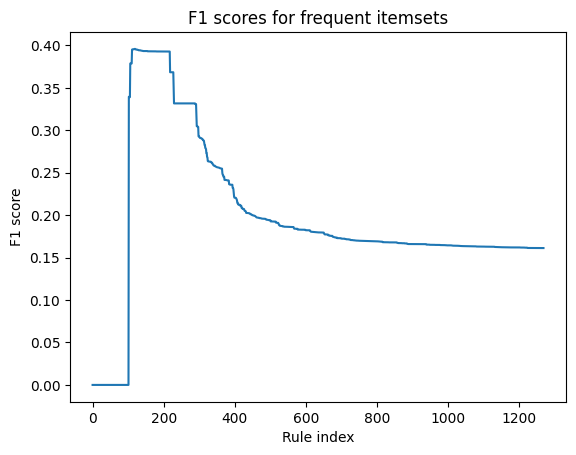

In [212]:
import mpldatacursor
import matplotlib.pyplot as plt
import mplcursors
plt.plot(f1)
plt.xlabel('Rule index')
plt.ylabel('F1 score')
plt.title('F1 scores for frequent itemsets')
mpldatacursor.datacursor(display='single')
plt.show()

In [196]:
sorted_rules = sorted(rules, key=lambda d: d['confidence'], reverse=True)
sorted_rules = sorted_rules[:math.floor(freq_itemsets_count * 0.18) + 1]
test_transactions = test_set.drop(['1', '0'], axis=1).apply(lambda row: frozenset(row.index[row]), axis=1).tolist()
scores = [classification.predict_proba_prune(object_o, sorted_rules) for object_o in test_transactions]
scores = np.array(scores)
scores

array([[0.        , 2.16821684],
       [2.30965101, 0.        ],
       [0.        , 0.        ],
       [2.23158677, 0.        ],
       [0.        , 0.        ],
       [2.4176686 , 0.        ],
       [2.52170779, 1.31631067],
       [0.        , 0.        ],
       [2.21186807, 0.        ],
       [2.52170779, 1.31631067],
       [2.53641676, 0.        ],
       [2.28973158, 0.        ],
       [0.        , 0.        ],
       [2.4176686 , 2.16821684],
       [0.        , 2.16821684],
       [2.4176686 , 0.        ],
       [0.        , 0.        ],
       [2.36988863, 0.        ],
       [2.28973158, 0.        ],
       [2.53641676, 1.31631067],
       [2.53641676, 0.        ],
       [2.4176686 , 0.        ],
       [0.        , 0.        ],
       [2.53641676, 2.15909648],
       [2.07876841, 0.        ],
       [2.4176686 , 0.        ],
       [2.28973158, 0.        ],
       [2.15293508, 0.        ],
       [2.25110664, 2.16821684],
       [0.        , 0.        ],
       [2.

In [197]:
# y_pred = np.zeros(len(y_test), dtype=int)
# for i in range(scores_test.shape[0]):
#     if scores_test[i, 0] == 0 and scores_test[i, 1] == 0:
#         y_pred[i] = -1
#     elif scores_test[i, 0] >= scores_test[i, 1]:
#         y_pred[i] = 0
#     else:
#         y_pred[i] = 1
y_test = test_set.apply(lambda row: 0 if row['0'] else 1, axis=1).tolist()
y_test = np.array(y_test)
y_pred = np.where(scores[:, 0] >= scores[:, 1], 0, 1)
y_pred[(scores[:, 0] == 0) & (scores[:, 1] == 0)] = -1
not_classified = np.sum(y_pred == -1)
y_pred[y_pred == -1] = 0
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [198]:
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * recall * precision / (recall + precision)
roc_auc = roc_auc_score(y_test, scores[:, 1])
accuracy = 100 * np.sum(y_test == y_pred) / len(y_test)
print(f"Pred as -1: {not_classified}")
print(f"Precision: {round(precision, 3)}")
print(f"Recall: {round(recall, 3)}")
print(f"F1: {round(F1, 6)}")
print(f"roc auc: {roc_auc}")
print(f"Accuracy: {round(accuracy, 3)}%")
print(f"Total Rules: {len(sorted_rules)}")
print(f"Number of freq itemsets: {freq_itemsets_count}")
print(f"Rules with class 0: {len(rules_0)}")
print(f"Rules with class 1: {len(rules_1)}")
print(f"Avg rule conf: {round(sum(rule['confidence'] for rule in sorted_rules) / len(sorted_rules), 3)}")
print(f"Max rule conf: {round(sorted_rules[0]['confidence'], 3)}")
print(f"Min rule conf: {round(sorted_rules[-1]['confidence'], 3)}\n")
sorted_0 = [rule for rule in sorted_rules if rule['consequent'] == '0']
sorted_1 = [rule for rule in sorted_rules if rule['consequent'] == '1']
try:
    print(f"Avg conf for c0 rules: {round(sum(rule['confidence'] for rule in sorted_0) / len(sorted_0), 3)}")
    print(f"Max conf for c0 rules: {round(sorted_0[0]['confidence'], 3)}")
    print(f"Min conf for c0 rules: {round(sorted_0[-1]['confidence'], 3)}")
    print(f"Avg conf for c1 rules: {round(sum(rule['confidence'] for rule in sorted_1) / len(sorted_1), 3)}")
    print(f"Max conf for c1 rules: {round(sorted_1[0]['confidence'], 3)}")
    print(f"Min conf for c1 rules: {round(sorted_1[-1]['confidence'], 3)}")
except Exception:
    pass

Pred as -1: 66
Precision: 0.5
Recall: 0.605
F1: 0.547368
roc auc: 0.7737437956611456
Accuracy: 90.652%
Total Rules: 229
Number of freq itemsets: 1269
Rules with class 0: 771
Rules with class 1: 498
Avg rule conf: 0.718
Max rule conf: 0.869
Min rule conf: 0.656

Avg conf for c0 rules: 0.718
Max conf for c0 rules: 0.869
Min conf for c0 rules: 0.656
Avg conf for c1 rules: 0.708
Max conf for c1 rules: 0.724
Min conf for c1 rules: 0.656
